# **Retail Dataset Analysis**

---



![alt text](https://images.prismic.io/mparticle/38d4b3a6642db23b7b5947e5092d5da487460d82_customer-data-platform-use-cases-retail-hero.png?auto=compress,format)

## **Problem Statement** :


---
 1. How will you classify retailers using sales data of feb'17 ? Please Analytics Techniques which can used for Classification


 2. What all variables/data will you use for classification of retailers



## **Attribute Information**

---



|Features|Description|
|-----|-----|
|Retailer Name: | There are total 9938 Retailers in this area | 
|Brands:|Total 12 Different brands can be sold to retailer| 
|Total Sales:|This is sum total sales of all brands| 
|Number of Brands:|Total Number of Unique brands purchased by retailers|
|Category |Based on the retailers total sale and number brands catered category is given|

## **Approach Taken to Solve the Problem:**
1. Importing the Libraries
2. Undestand Structure of Data
3. Check for Null Values
4. Selecting Features based on which Categories will be created.
features used : 
 *  Total Sales 
 *  Number of Brands
5. Kmeans Clustering Algorithm to create clusters/categories . To get the optimum value of K Elbow method is used .
6. Visualising the KMeans output
7. Creating The Final Dataframe
8. Find out how many retailers are there in each Category
9. Retailers are distribute into three Categories:
  * Category A - Medium Total Sale value Retailer.
  * Category B - Highest Total Sale value Retailer.
  * Category C - Lowest Total Sale Value Retailer.


## **Importing All Required Libraries**

In [0]:
#Importing all Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style

plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns #Data Visualisation
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Upload file on google Colab
from google.colab import files
uploaded = files.upload()

Saving retail.xlsx to retail.xlsx


In [132]:
#Loading The Dataset
import io
#The command written below is generally used to load .xlsx format file 
df = pd.read_excel(io.BytesIO(uploaded['retail.xlsx']))
df.head(5)


,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30826.61,0.00,0.00,30826.61,1,nan
1,Retailer 2,9833.11,0.00,0.00,24073.63,33806.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67713.17,3,nan
2,Retailer 3,24690.67,0.00,0.00,0.00,27367.04,0.00,0.00,0.00,12948.70,0.00,0.00,0.00,65006.41,3,nan
3,Retailer 4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,nan
4,Retailer 5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,nan


## **Understand Structure of data**
---
The .info() command helps us to understand the structure of data i.e how many rows does the dataset have ? how many columns the dataset consist of? What type of data does each column holds ? for example( object/string,int, float)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
Retailer Name           9938 non-null object
Brand1                  9938 non-null float64
Brand2                  9938 non-null float64
Brand3                  9938 non-null float64
Brand4                  9938 non-null float64
Brand5                  9938 non-null float64
Brand6                  9938 non-null float64
Brand7                  9938 non-null float64
Brand8                  9938 non-null float64
Brand9                  9938 non-null float64
Brand10                 9938 non-null float64
Brand11                 9938 non-null float64
Brand12                 9938 non-null float64
Total Sales             9938 non-null float64
Number of Brands        9938 non-null int64
Category of Retailer    0 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


## **Check for Null Values**

In [134]:
df.isnull().sum()

Retailer Name              0
Brand1                     0
Brand2                     0
Brand3                     0
Brand4                     0
Brand5                     0
Brand6                     0
Brand7                     0
Brand8                     0
Brand9                     0
Brand10                    0
Brand11                    0
Brand12                    0
Total Sales                0
Number of Brands           0
Category of Retailer    9938
dtype: int64

## **Subsetting the dataframe**


---
I will be using this two feature variables shown below to create categories of all retailers


In [135]:
x=df.iloc[:,[13,14]]
x

,Total Sales,Number of Brands
0,30826.61,1
1,67713.17,3
2,65006.41,3
3,0.00,0
4,0.00,0
...,...,...
9933,0.00,0
9934,0.00,0
9935,0.00,0
9936,48324.57,2


Since i have to create categories then this problem is then related to clustering algorithm which comes under unsupervised learning .
i have used Kmeans algorithm to create clusters. To select the optimum number of clusters i have performed the step which is shown below


## **Selecting Optimum Number of Clusters**

---



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'No. of Clusters')

Text(0, 0.5, 'wcss')

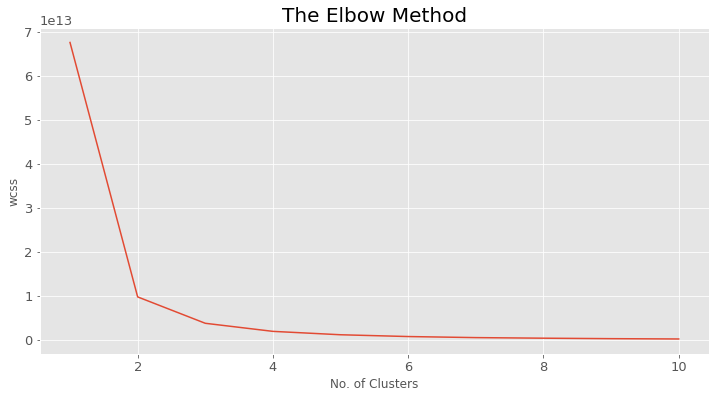

In [136]:
from sklearn.cluster import KMeans #importing required library
wcss = []  # Create an empty list to store value of wcss
for i in range(1, 11): #provide a range of number of clusters
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) #intialize kmeans algorithm
    km.fit(x) 
    wcss.append(km.inertia_) # Append the values 
plt.figure(figsize=(12,6))   
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

The above plot shown is an elbow method plot.Since we don't have any beforehand idea or at best have some initial guess about it, its actually possible to generate a plot which can give us the number of clusters.where number of clusters (K) is in the X-axis and within cluster sum of squares (WCSS) is on the Y-axis.And after carefully observing the plot i had selected the value of K-3/n_clusters=3

## **K-MEANS Clustering**

---



In [0]:
#Creating A new Dataframe
new_df=df[['Total Sales','Number of Brands']]

In [0]:
# Applying the ALgorithm
#Selected the value of n_clusters=3 based on the elbow method
X=new_df.values
km = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 9)
y_kmeans = km.fit_predict(X)

## **Visualisation of Kmeans Clustering Output**

---



<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Clusters of retailers')

Text(0.5, 0, 'Total Sales')

Text(0, 0.5, 'No of Brands')

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

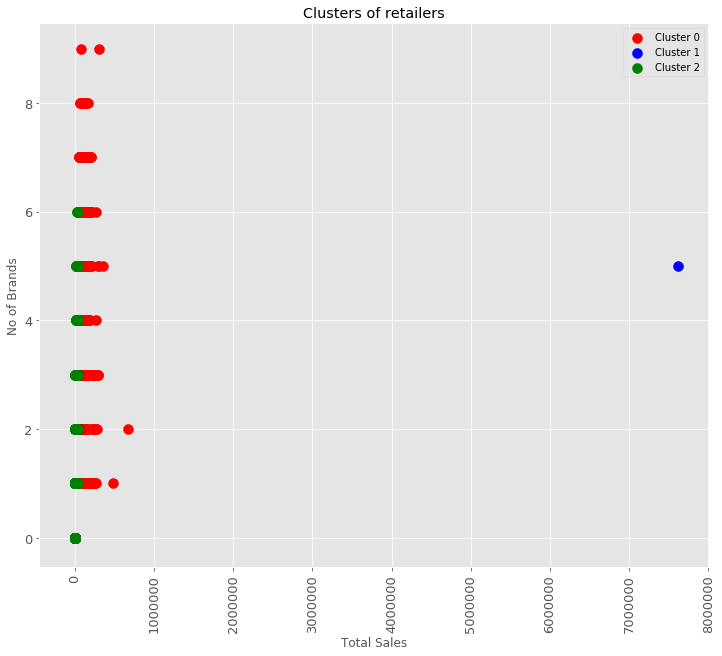

In [142]:
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of retailers')
plt.xlabel('Total Sales')
plt.ylabel('No of Brands')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## **Observations :**
1.  **Cluster 0/Category A** - It has minimum Total sales of Rs.44303.1832 & Maximum Total sales of Rs.6,75,703 . The Retailers of this clusters have done business  with  minimum of 1 brand and maximum of 9 brands.

2. **Cluster 1/Category B** - It has just one retailer in it his total sale is about Rs.76 Lacs . The Retailer name is Retailer 3973. The retailer in this cluster has done business with only 5 brands

3. **Cluster 2/Category C** -  The retailers in this Cluster/Category have done overall total sales of  Rs 43264 which is very low as compared to other brands. There are some retailers who have not done business with any of the retailers.

After Taking the above things into Consideration we can say that :

* **Cluster 0/Category A  - Medium Total Sale value Retailer.**

* **Cluster 1/Category B - Highest Total Sale value Retailer.**

* **Cluster 2/Category C - Lowest  Total Sale Value Retailer.**

hence major focus should be done on the improvement in sales of retailers in **Cluster 2/Category C**


## **Creating the Final Dataframe**

In [149]:
y_kmeans=pd.DataFrame(y_kmeans)
df['Category of Retailer']=y_kmeans
df["Category of Retailer"].replace({0:"A", 1: "B",2:"C"}, inplace=True)
df.head(5)

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30826.61,0.00,0.00,30826.61,1,C
1,Retailer 2,9833.11,0.00,0.00,24073.63,33806.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67713.17,3,A
2,Retailer 3,24690.67,0.00,0.00,0.00,27367.04,0.00,0.00,0.00,12948.70,0.00,0.00,0.00,65006.41,3,A
3,Retailer 4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,C
4,Retailer 5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,C


## **How many retailers are present in each Categories ?**


---




Total Number of Retailers in Each Category
C    8789
A    1148
B       1
Name: Category of Retailer, dtype: int64


<Figure size 864x720 with 0 Axes>

Text(0.5, 0, 'Category of Retailer')

Text(0, 0.5, 'No. of Retailer in each Category')

Text(0.5, 1.0, 'Total No. of Retailer in each Category')

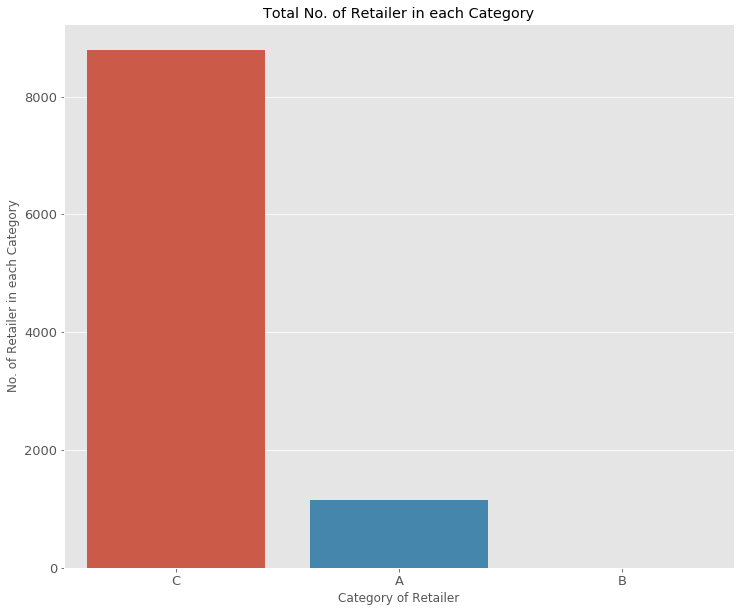

In [155]:
A=df['Category of Retailer'].value_counts()
print('Total Number of Retailers in Each Category')
print(A)
print('=='*100)
plt.figure(figsize=(12,10))
sns.countplot(df['Category of Retailer'])
plt.xlabel('Category of Retailer')
plt.ylabel('No. of Retailer in each Category')
plt.title('Total No. of Retailer in each Category')

**Observations**:


* Most of Retailers are present in the  Category C . That is more than 80% of retailers in the dataset  are from Category C which is the Low Sale value Category.
* Around 1000 retailers are present in Category A.
* There is only 1 retailer in category B since the count is small compared to others it is not visualised in the plot


## **Creating Final Excel Sheet**

---



In [0]:
submission=df
submission.to_excel('submission.xlsx',index=False)


In [0]:
from google.colab import files
files.download('submission.xlsx')